#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

#Reading Data

In [ ]:
data = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#EDA to get Data ready for the Models

In [ ]:
data.loc[data.v1=='ham', 'v1'] = 0
data.loc[data.v1=='spam', 'v1'] = 1

In [ ]:
data.duplicated().sum()

403

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5169 non-null   object
 1   v2          5169 non-null   object
 2   Unnamed: 2  43 non-null     object
 3   Unnamed: 3  10 non-null     object
 4   Unnamed: 4  5 non-null      object
dtypes: object(5)
memory usage: 242.3+ KB


In [ ]:
data.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

<Axes: ylabel='v1'>

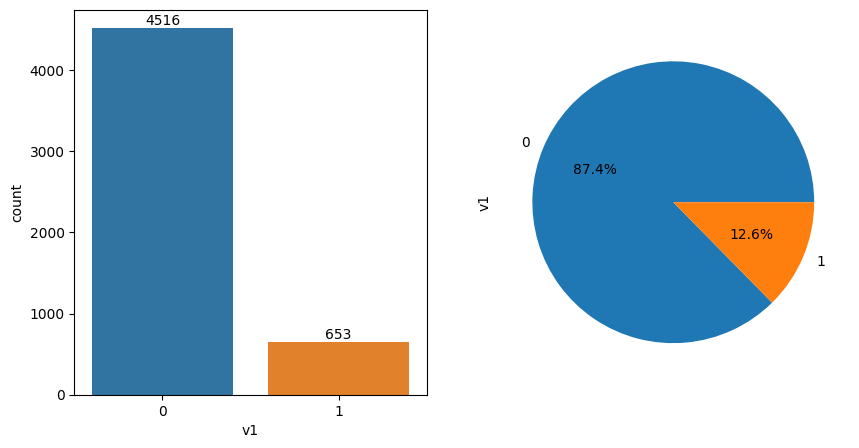

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
plot1 = sns.countplot(data, x='v1', ax=ax[0])
# show count number above the bins
for container in plot1.containers:
    plot1.bar_label(container)

data.v1.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])

In [ ]:
pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['sentences_count'] = data['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
data['words_count'] = data['v2'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
data['characters_count'] = data['v2'].apply(len)

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,sentences_count,words_count,characters_count
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,2,24,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,2,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,2,37,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,1,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,1,15,61


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(data['v2']).toarray()
y = data['v1'].values

#Splitting Data To train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

#Here we gonna apply lazypredict to know what are the best models to use for this data

In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [13:53<00:26, 26.25s/it]

[LightGBM] [Info] Number of positive: 504, number of negative: 3631
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1702
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 431
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121886 -> initscore=-1.974687
[LightGBM] [Info] Start training from score -1.974687


100%|██████████| 29/29 [13:59<00:00, 28.95s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.97               0.95     0.95      0.97   
LGBMClassifier                     0.98               0.94     0.94      0.98   
PassiveAggressiveClassifier        0.98               0.94     0.94      0.98   
LinearSVC                          0.98               0.94     0.94      0.98   
XGBClassifier                      0.98               0.94     0.94      0.98   
BaggingClassifier                  0.97               0.93     0.93      0.97   
DecisionTreeClassifier             0.97               0.93     0.93      0.97   
BernoulliNB                        0.98               0.93     0.93      0.98   
ExtraTreesClassifier               0.98               0.92     0.92      0.98   
AdaBoostClassifier                 0.97               0.92     0.92      0.97   
RandomForestClassifier      

#Applying Models

#Naive-Base(BernolliNB-Model)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'fit_prior': [True, False]
}
NB_model = BernoulliNB()

g_search = GridSearchCV(estimator=NB_model, param_grid=param_grid,return_train_score=True, verbose=2)

g_search.fit(x_train,y_train)
print('Best paramters',g_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   0.9s
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   1.3s
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   2.4s
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   1.8s
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   1.2s
[CV] END ......................alpha=0.0001, fit_prior=False; total time=   1.0s
[CV] END ......................alpha=0.0001, fit_prior=False; total time=   1.3s
[CV] END ......................alpha=0.0001, fit_prior=False; total time=   0.7s
[CV] END ......................alpha=0.0001, fit_prior=False; total time=   0.7s
[CV] END ......................alpha=0.0001, fit_prior=False; total time=   0.6s
[CV] END ........................alpha=0.001, fit_prior=True; total time=   0.8s
[CV] END ........................alpha=0.001, fi

In [ ]:
from sklearn.naive_bayes import BernoulliNB
NB_model = BernoulliNB(alpha= 0.001, fit_prior= True)

NB_model.fit(x_train,y_train)

y_pred = NB_model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.97      0.91      0.94       149

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



<Axes: >

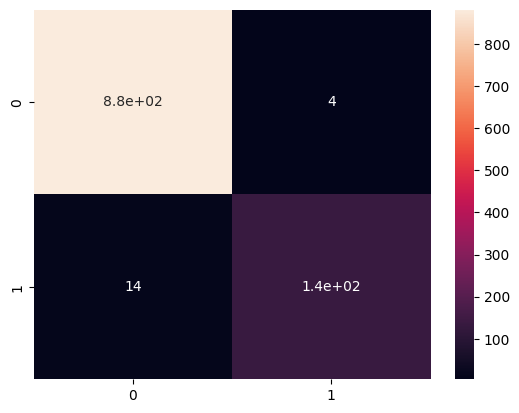

In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True)

In [ ]:
accuracy = metrics.accuracy_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)


print(f"NB model accuracy = {100* accuracy:.5} %")
print(f"NB model f1_score = {100* f1_score:.5} %")
print(f"NB model precision  = {100* precision:.5} %")
print(f"NB model recall = {100* recall:.5} %")

NB model accuracy = 98.259 %
NB model f1_score = 93.75 %
NB model precision  = 97.122 %
NB model recall = 90.604 %


Text(0.5, 1.0, 'ROC_curve')

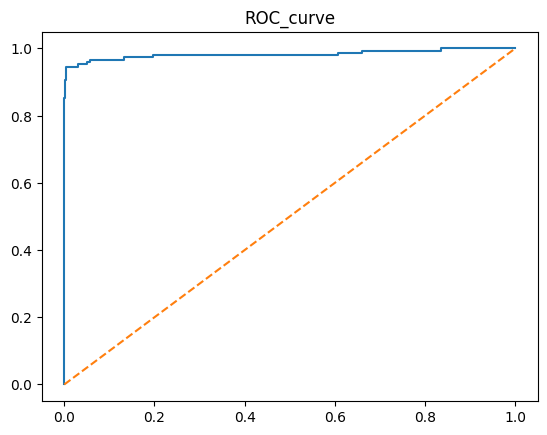

In [ ]:
y_pred_propa = NB_model.predict_proba(x_test)

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_propa[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC_curve")

In [ ]:
AUC = metrics.roc_auc_score(y_test,y_pred_propa[:,1])

print(f"NB model AUC = {100* AUC:.5} %")

NB model AUC = 98.248 %


#After Applying Over Sampling(Smote)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'fit_prior': [True, False]
}
NB_model = BernoulliNB()

g_search = GridSearchCV(estimator=NB_model, param_grid=param_grid,return_train_score=True, verbose=2)

g_search.fit(x_train_resampled,y_train_resampled)
print('Best paramters',g_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   1.3s
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   1.1s
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   1.3s
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   1.3s
[CV] END .......................alpha=0.0001, fit_prior=True; total time=   1.5s
[CV] END ......................alpha=0.0001, fit_prior=False; total time=   1.5s
[CV] END ......................alpha=0.0001, fit_prior=False; total time=   1.9s
[CV] END ......................alpha=0.0001, fit_prior=False; total time=   1.2s
[CV] END ......................alpha=0.0001, fit_prior=False; total time=   1.5s
[CV] END ......................alpha=0.0001, fit_prior=False; total time=   1.3s
[CV] END ........................alpha=0.001, fit_prior=True; total time=   1.4s
[CV] END ........................alpha=0.001, fi

In [ ]:
from sklearn.naive_bayes import BernoulliNB
NB_model = BernoulliNB(alpha= 0.1, fit_prior= True)

NB_model.fit(x_train_resampled,y_train_resampled)

y_pred = NB_model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       885
           1       0.91      0.90      0.90       149

    accuracy                           0.97      1034
   macro avg       0.94      0.94      0.94      1034
weighted avg       0.97      0.97      0.97      1034



<Axes: >

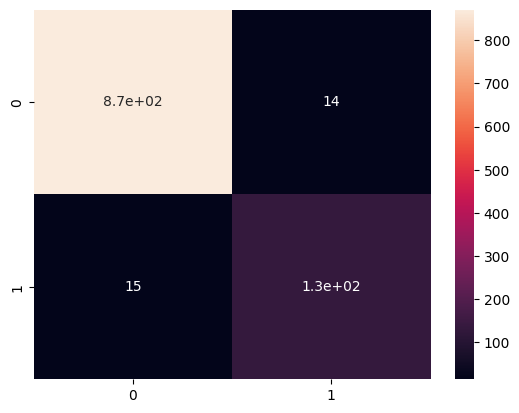

In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
print(f"Model accuracy after applying SMOTE: {100 * accuracy:.2f}%")
print(f"Model f1_score after applying SMOTE: {100 * f1_score:.2f}%")
print(f"Model precision after applying SMOTE: {100 * precision:.2f}%")
print(f"Model recall after applying SMOTE: {100 * recall:.2f}%")

Model accuracy after applying SMOTE: 97.20%
Model f1_score after applying SMOTE: 90.24%
Model precision after applying SMOTE: 90.54%
Model recall after applying SMOTE: 89.93%


Text(0.5, 1.0, 'ROC_curve')

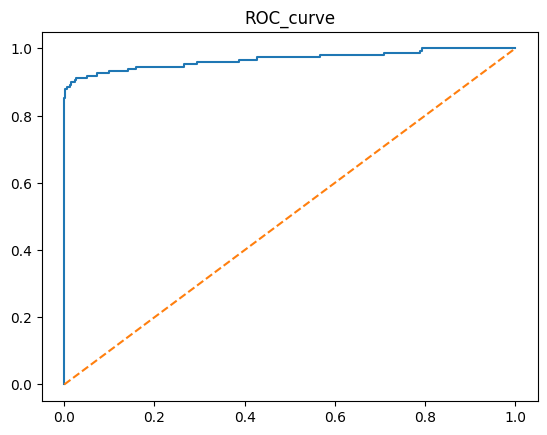

In [ ]:
y_pred_propa = NB_model.predict_proba(x_test)

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_propa[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC_curve")

In [ ]:
AUC = metrics.roc_auc_score(y_test,y_pred_propa[:,1])

print(f"NB model AUC = {100* AUC:.5} %")

NB model AUC = 96.746 %


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

x_rus,y_rus = rus.fit_resample(x_train,y_train)

#After Applying Under Sampling(RandomUnderSampling)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
NB_model = BernoulliNB(alpha= 0.1, fit_prior= True)

NB_model.fit(x_rus,y_rus)

y_pred = NB_model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       885
           1       0.97      0.93      0.95       149

    accuracy                           0.99      1034
   macro avg       0.98      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



<Axes: >

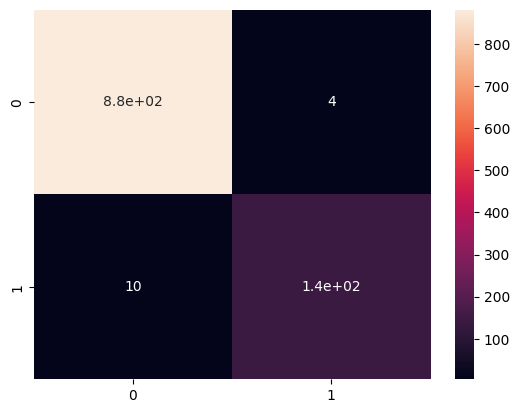

In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
print(f"Model accuracy after applying RandomUnderSampler: {100 * accuracy:.2f}%")
print(f"Model f1_score after applying RandomUnderSampler: {100 * f1_score:.2f}%")
print(f"Model precision after applying RandomUnderSampler: {100 * precision:.2f}%")
print(f"Model recall after applying RandomUnderSampler: {100 * recall:.2f}%")

Model accuracy after applying RandomUnderSampler: 98.65%
Model f1_score after applying RandomUnderSampler: 95.21%
Model precision after applying RandomUnderSampler: 97.20%
Model recall after applying RandomUnderSampler: 93.29%


Text(0.5, 1.0, 'ROC_curve')

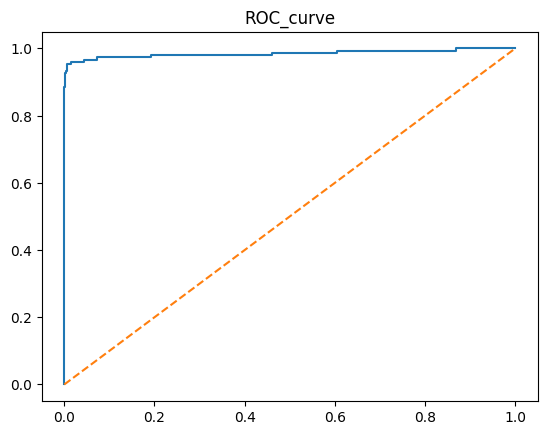

In [ ]:
y_pred_propa = NB_model.predict_proba(x_test)

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_propa[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC_curve")

In [ ]:
AUC = metrics.roc_auc_score(y_test,y_pred_propa[:,1])

print(f"NB model AUC = {100* AUC:.5} %")

NB model AUC = 98.464 %


#Boosting

#XGBoostModel

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier()

g_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,return_train_score=True, verbose=2)

g_search.fit(x_train,y_train)
print('Best paramters',g_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  12.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   9.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  10.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  12.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  12.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  16.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [ ]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier()

xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.97      0.88      0.92       149

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



<Axes: >

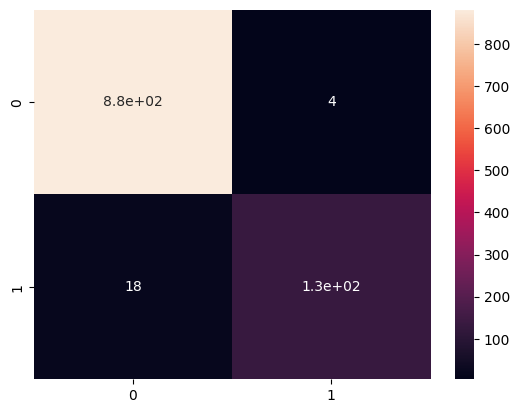

In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
print(f"Model accuracy after applying xgb_model: {100 * accuracy:.2f}%")
print(f"Model f1_score after applying xgb_model: {100 * f1_score:.2f}%")
print(f"Model precision after applying xgb_model: {100 * precision:.2f}%")
print(f"Model recall after applying xgb_model: {100 * recall:.2f}%")

Model accuracy after applying xgb_model: 97.87%
Model f1_score after applying xgb_model: 92.25%
Model precision after applying xgb_model: 97.04%
Model recall after applying xgb_model: 87.92%


Text(0.5, 1.0, 'ROC_curve')

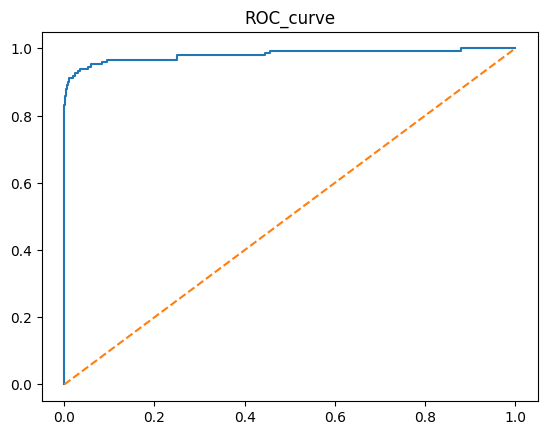

In [ ]:
y_pred_propa = xgb_model.predict_proba(x_test)

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_propa[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC_curve")

In [ ]:
AUC = metrics.roc_auc_score(y_test,y_pred_propa[:,1])

print(f"NB model AUC = {100* AUC:.5} %")

NB model AUC = 98.16 %


#After Applying Over Sampling(Smote)

In [ ]:
xgb_model = XGBClassifier()

xgb_model.fit(x_train_resampled,y_train_resampled)

y_pred = xgb_model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       885
           1       0.64      0.85      0.73       149

    accuracy                           0.91      1034
   macro avg       0.81      0.89      0.84      1034
weighted avg       0.93      0.91      0.92      1034



<Axes: >

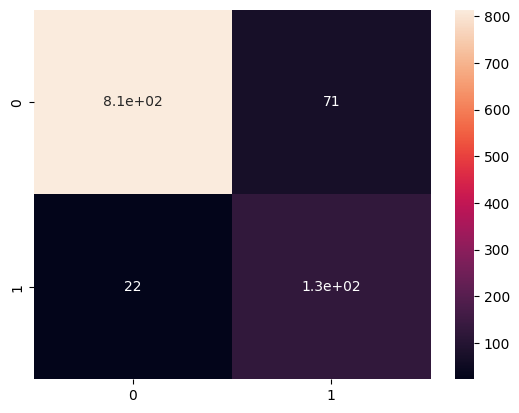

In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True)

Text(0.5, 1.0, 'ROC_curve')

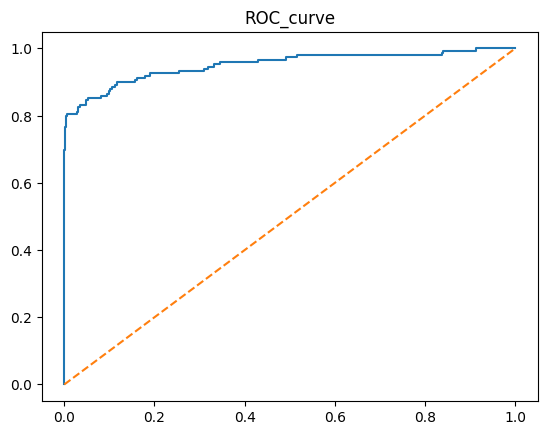

In [ ]:
y_pred_propa = xgb_model.predict_proba(x_test)

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_propa[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC_curve")

In [ ]:
AUC = metrics.roc_auc_score(y_test,y_pred_propa[:,1])

print(f"NB model AUC = {100* AUC:.5} %")

NB model AUC = 95.098 %


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
print(f"Model accuracy after applying SMOTE: {100 * accuracy:.2f}%")
print(f"Model f1_score after applying SMOTE: {100 * f1_score:.2f}%")
print(f"Model precision after applying SMOTE: {100 * precision:.2f}%")
print(f"Model recall after applying SMOTE: {100 * recall:.2f}%")

Model accuracy after applying SMOTE: 91.01%
Model f1_score after applying SMOTE: 73.20%
Model precision after applying SMOTE: 64.14%
Model recall after applying SMOTE: 85.23%


#After Applying Under Sampling(RandomUnderSampling)

In [ ]:
xgb_model = XGBClassifier()

xgb_model.fit(x_rus,y_rus)

y_pred = xgb_model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       885
           1       0.77      0.91      0.83       149

    accuracy                           0.95      1034
   macro avg       0.88      0.93      0.90      1034
weighted avg       0.95      0.95      0.95      1034



<Axes: >

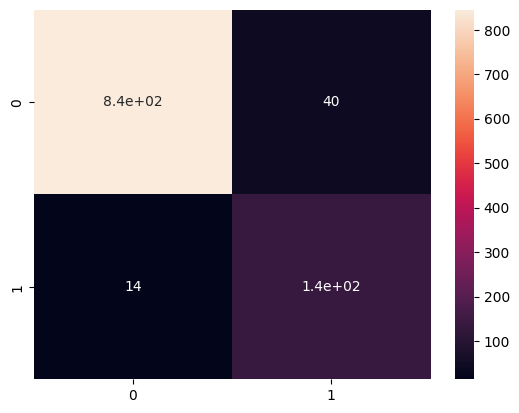

In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True)

Text(0.5, 1.0, 'ROC_curve')

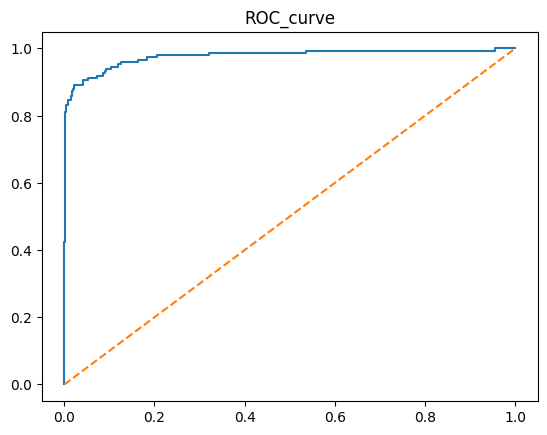

In [ ]:
y_pred_propa = xgb_model.predict_proba(x_test)

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_propa[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC_curve")

In [ ]:
AUC = metrics.roc_auc_score(y_test,y_pred_propa[:,1])

print(f"NB model AUC = {100* AUC:.5} %")

NB model AUC = 97.708 %


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
print(f"Model accuracy after applying RandomUnderSampler: {100 * accuracy:.2f}%")
print(f"Model f1_score after applying RandomUnderSampler: {100 * f1_score:.2f}%")
print(f"Model precision after applying RandomUnderSampler: {100 * precision:.2f}%")
print(f"Model recall after applying RandomUnderSampler: {100 * recall:.2f}%")

Model accuracy after applying SMOTE: 94.78%
Model f1_score after applying SMOTE: 83.33%
Model precision after applying SMOTE: 77.14%
Model recall after applying SMOTE: 90.60%


#Baging

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:

model_1 = DecisionTreeClassifier()
model_2 = BernoulliNB()
model_3 = RandomForestClassifier()

final_model = VotingClassifier(
    estimators=[('DT',model_1),('SMV',model_2),('RF',model_3),],
    weights = [2,2,4]

)

final_model.fit(x_train,y_train)

y_pred = final_model.predict(x_test)

In [ ]:

accuracy = metrics.accuracy_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)


print(f"final model accuracy = {100* accuracy:.5} %")
print(f"final model f1_score = {100* f1_score:.5} %")
print(f"final model precision = {100* precision:.5} %")
print(f"final model recall = {100* recall:.5} %")

final model accuracy = 97.195 %
final model f1_score = 89.219 %
final model precision = 100.0 %
final model recall = 80.537 %


<Axes: >

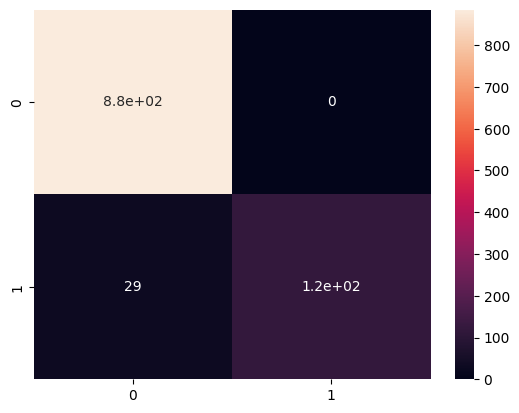

In [ ]:
import seaborn as sns
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True)

In [ ]:
model_1 = DecisionTreeClassifier()
model_2 = BernoulliNB()
model_3 = RandomForestClassifier()

final_model = VotingClassifier(
    estimators=[('DT',model_1),('SMV',model_2),('RF',model_3),],
    weights = [2,2,4]

)

final_model.fit(x_train_resampled,y_train_resampled)

y_pred = final_model.predict(x_test)

<Axes: >

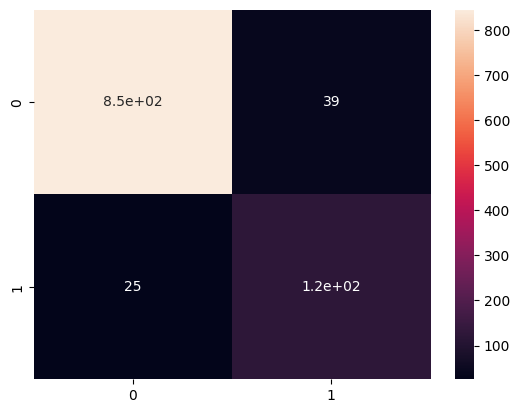

In [ ]:
import seaborn as sns
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True)

In [ ]:

accuracy = metrics.accuracy_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)


print(f"final model accuracy = {100* accuracy:.5} %")
print(f"final model f1_score = {100* f1_score:.5} %")
print(f"final model precision = {100* precision:.5} %")
print(f"final model recall = {100* recall:.5} %")

final model accuracy = 93.81 %
final model f1_score = 79.487 %
final model precision = 76.074 %
final model recall = 83.221 %


In [ ]:
model_1 = DecisionTreeClassifier()
model_2 = BernoulliNB()
model_3 = RandomForestClassifier()

final_model = VotingClassifier(
    estimators=[('DT',model_1),('SMV',model_2),('RF',model_3),],
    weights = [2,2,4]

)

final_model.fit(x_rus,y_rus)

y_pred = final_model.predict(x_test)

<Axes: >

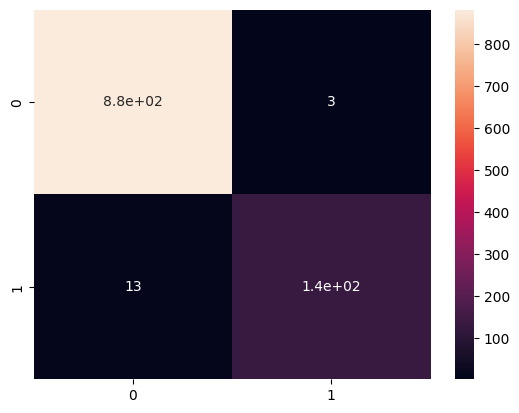

In [ ]:
import seaborn as sns
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True)

In [ ]:

accuracy = metrics.accuracy_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)


print(f"final model accuracy = {100* accuracy:.5} %")
print(f"final model f1_score = {100* f1_score:.5} %")
print(f"final model precision = {100* precision:.5} %")
print(f"final model recall = {100* recall:.5} %")

final model accuracy = 98.453 %
final model f1_score = 94.444 %
final model precision = 97.842 %
final model recall = 91.275 %


#Best results so far

- Model accuracy after applying RandomUnderSampler: 98.65%
- Model f1_score after applying RandomUnderSampler: 95.21%
- Model precision after applying RandomUnderSampler: 97.20%
- Model recall after applying RandomUnderSampler: 93.29%

This results is for BernolliNB model after doing Randomundersampling we got the best results for this dataset